<a href="https://colab.research.google.com/github/gshreya5/colab/blob/main/stackoverflow_2022_eda.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# EDA on STACKOVERFLOW SURVEY 2022

# Objectives

* Demographics of the survey respondents and the global programming community
* Distribution of programming skills, experience, and preferences
* Employment-related information, preferences, and opinions

# Import Libraries

In [2]:
!pip install opendatasets

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [3]:
from urllib.request import urlretrieve 
import zipfile
import opendatasets as od

import pandas as pd 
import os
import numpy as np

import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

import missingno as msno

%matplotlib inline

# Load dataset

In [4]:
url = 'https://info.stackoverflowsolutions.com/rs/719-EMH-566/images/stack-overflow-developer-survey-2022.zip'
urlretrieve(url,'')
extract_dir = "stackoverflow_2022_dataset"

zip_path, _ = urlretrieve(url)
with zipfile.ZipFile(zip_path, "r") as f:
    f.extractall(extract_dir)

Read Dataset

In [11]:
df = pd.read_csv('/content/'+extract_dir+'/'+os.listdir(extract_dir)[1])

In [12]:
df.shape

(73268, 79)

In 2022 Over 70,000 developers participated in StackOverflow Survey

Let's view the list of columns in the data frame.

In [13]:
df.columns

Index(['ResponseId', 'MainBranch', 'Employment', 'RemoteWork',
       'CodingActivities', 'EdLevel', 'LearnCode', 'LearnCodeOnline',
       'LearnCodeCoursesCert', 'YearsCode', 'YearsCodePro', 'DevType',
       'OrgSize', 'PurchaseInfluence', 'BuyNewTool', 'Country', 'Currency',
       'CompTotal', 'CompFreq', 'LanguageHaveWorkedWith',
       'LanguageWantToWorkWith', 'DatabaseHaveWorkedWith',
       'DatabaseWantToWorkWith', 'PlatformHaveWorkedWith',
       'PlatformWantToWorkWith', 'WebframeHaveWorkedWith',
       'WebframeWantToWorkWith', 'MiscTechHaveWorkedWith',
       'MiscTechWantToWorkWith', 'ToolsTechHaveWorkedWith',
       'ToolsTechWantToWorkWith', 'NEWCollabToolsHaveWorkedWith',
       'NEWCollabToolsWantToWorkWith', 'OpSysProfessional use',
       'OpSysPersonal use', 'VersionControlSystem', 'VCInteraction',
       'VCHostingPersonal use', 'VCHostingProfessional use',
       'OfficeStackAsyncHaveWorkedWith', 'OfficeStackAsyncWantToWorkWith',
       'OfficeStackSyncHaveWork

In [14]:
pd.set_option('display.max_columns',None) 

It appears that shortcodes for questions have been used as column names.
Lets get the schema df to get info on column names

In [17]:
schema = pd.read_csv('/content/'+extract_dir+'/'+os.listdir(extract_dir)[2])
schema = schema.set_index('qname').question

# Data Cleaning 


Selected a subset of columns relevant to our analysis

In [18]:
selected_columns = ['EdLevel','Country','Age', 'Gender', 'Ethnicity',
                   'LanguageHaveWorkedWith','LanguageWantToWorkWith','CodingActivities','YearsCode', 'YearsCodePro',
                   'Employment','DevType','RemoteWork', 'WorkExp','ConvertedCompYearly','MainBranch']

data = df[selected_columns].copy()

In [19]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 73268 entries, 0 to 73267
Data columns (total 16 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   EdLevel                 71571 non-null  object 
 1   Country                 71771 non-null  object 
 2   Age                     70946 non-null  object 
 3   Gender                  70853 non-null  object 
 4   Ethnicity               69474 non-null  object 
 5   LanguageHaveWorkedWith  70975 non-null  object 
 6   LanguageWantToWorkWith  67027 non-null  object 
 7   CodingActivities        58899 non-null  object 
 8   YearsCode               71331 non-null  object 
 9   YearsCodePro            51833 non-null  object 
 10  Employment              71709 non-null  object 
 11  DevType                 61302 non-null  object 
 12  RemoteWork              58958 non-null  object 
 13  WorkExp                 36769 non-null  float64
 14  ConvertedCompYearly     38071 non-null

Some columns have object dtype even though they have numeric values so lets convert them to numeric dtype

In [20]:
data.loc[data[data.YearsCode == 'Less than 1 year' ].index,  'YearsCode'] = 0
data.loc[data[data.YearsCode == 'More than 50 years'  ].index,  'YearsCode'] = 51
data.loc[data[data.YearsCodePro == 'Less than 1 year' ].index,  'YearsCodePro'] = 0
data.loc[data[data.YearsCodePro == 'More than 50 years'  ].index,  'YearsCodePro'] = 51

In [21]:
data.YearsCode = pd.to_numeric(data.YearsCode)
data.YearsCodePro = pd.to_numeric(data.YearsCodePro)

There's data inconsistencies in some object columns so let's fix them

In [22]:
data.where(~(data.Gender.str.contains(';', na=False)), np.nan, inplace=True)
data.where(~(data.Gender.str.contains(':', na=False)), np.nan, inplace=True)

In [23]:
data.describe()

,YearsCode,YearsCodePro,WorkExp,ConvertedCompYearly
count,70370.000000,51262.000000,36376.000000,3.765300e+04
mean,12.249808,9.909192,10.230784,1.705594e+05
std,9.942508,8.704456,8.685667,7.831367e+05
min,0.000000,0.000000,0.000000,1.000000e+00
25%,5.000000,4.000000,4.000000,3.583200e+04
50%,9.000000,7.000000,8.000000,6.782400e+04
75%,16.000000,14.000000,15.000000,1.200000e+05
max,51.000000,51.000000,50.000000,5.000000e+07


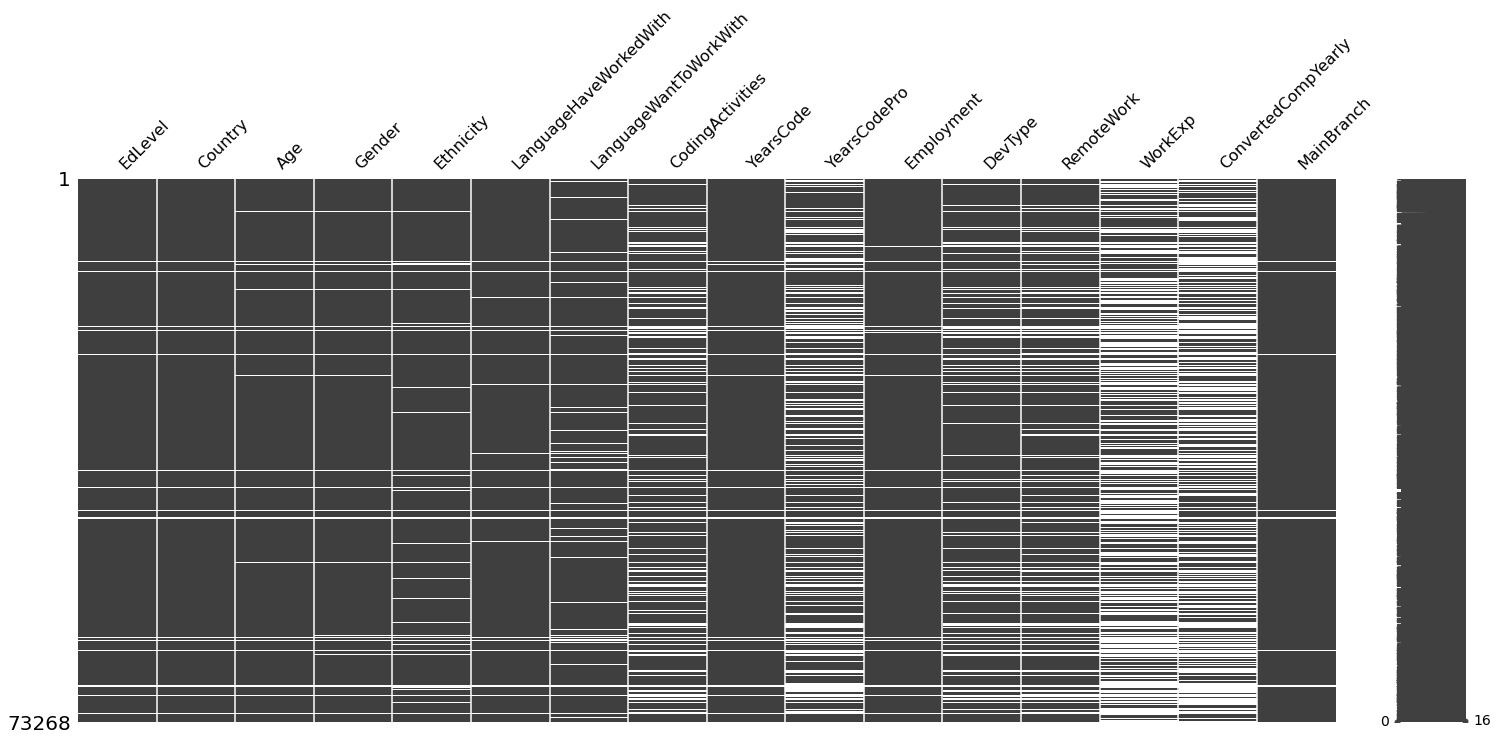

In [24]:
msno.matrix(data);

# Exploratory Analysis and Visualization


Let's explore our df  

In [25]:
sns.set_style('whitegrid')
matplotlib.rcParams['font.size'] = 14
matplotlib.rcParams['figure.figsize'] = (12,5)

# Country

In [26]:
data.head(1)

,EdLevel,Country,Age,Gender,Ethnicity,LanguageHaveWorkedWith,LanguageWantToWorkWith,CodingActivities,YearsCode,YearsCodePro,Employment,DevType,RemoteWork,WorkExp,ConvertedCompYearly,MainBranch
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None of these


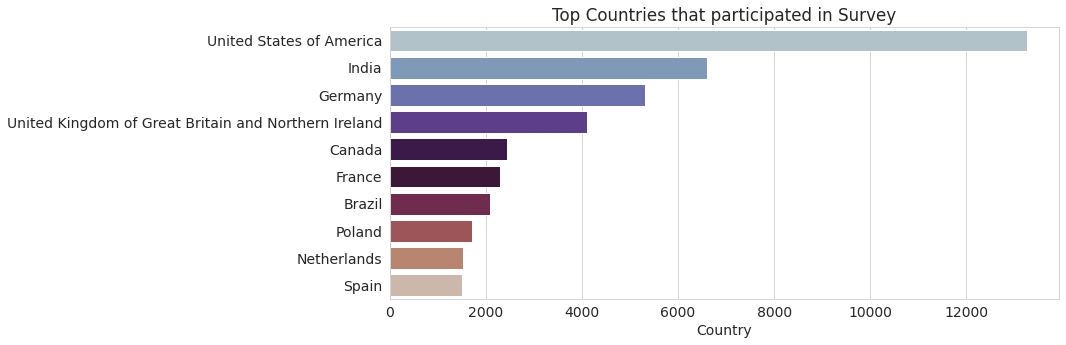

In [27]:
top_countries = data.Country.value_counts().head(10)
plt.title('Top Countries that participated in Survey')
sns.barplot(y=top_countries.index,x=top_countries,palette='twilight');

###### Insight

Most number of responses came from US, India, UK  
Maybe because stackoverflow uses English as primary language

#### Lets try finding the percentage of responses from English-speaking vs. non-English speaking countries

In [29]:
od.download('countries-languages-spoken')
temp = data.copy()
temp=temp.merge(pd.read_csv('/content/countries-languages-spoken/countries-languages.csv'), on='Country')

Using downloaded and verified file: ./countries-languages-spoken/countries-languages.csv


In [30]:
english = temp['Languages Spoken'].str.contains('English').sum()
total = temp['Languages Spoken'].count() 
english_percent =  english/total *100
english_percent = np.round(english_percent,2)
print('There are only about',english_percent,'% english speakers(with varying comprehension level)')

There are only about 43.53 % english speakers(with varying comprehension level)


# Age

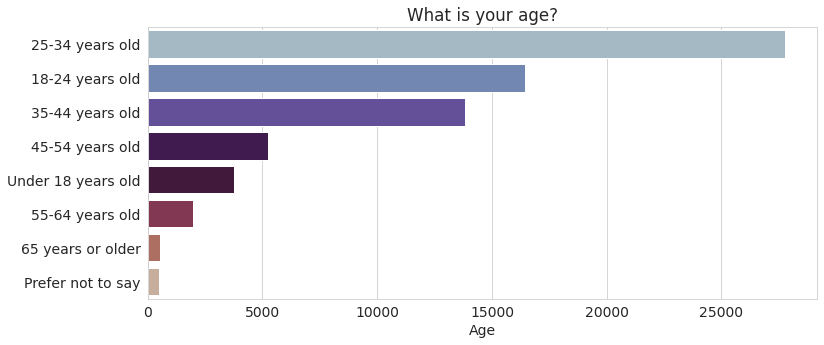

In [31]:
age = data.Age.value_counts()
plt.title(schema['Age'])
sns.barplot(y=age.index,x=age,palette='twilight');

##### Insight

Ages 25-44 seem to be most active, also looks like representation of coders in general  

# Gender

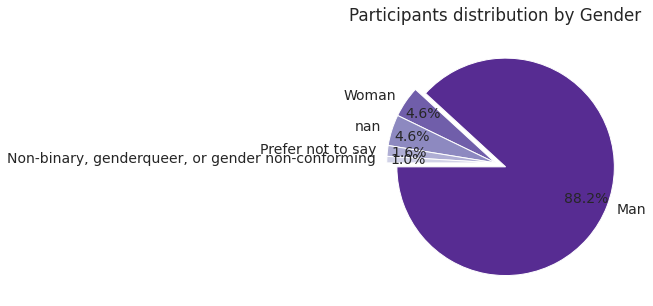

In [32]:
gender = data.Gender.value_counts(dropna=False)
#gender = data.Gender.value_counts()
plt.title('Participants distribution by Gender')

plt.pie(gender,labels=gender.index,autopct='%1.1f%%',explode= [0.1,0,0,0,0] ,pctdistance=0.8, 
        startangle=180,colors=sns.color_palette('Purples_r'));

##### Insight
We already know industry is dominated by Male Gender and this reflects in survey responses too.

Although it is not an exact reflection of coders community, it still shows the need for inclusion of gender identities other than male.  

# Education Level


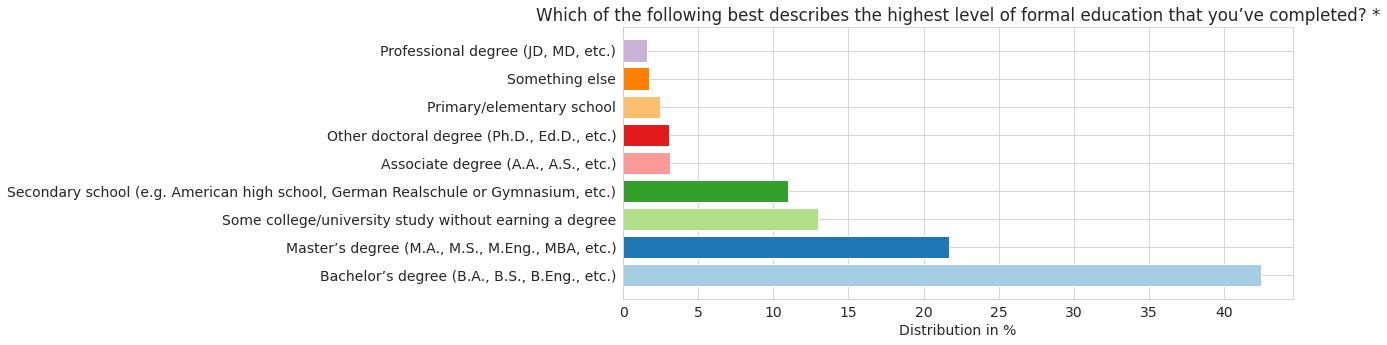

In [33]:
ed = round(data.EdLevel.value_counts()/data.EdLevel.count() * 100,2)
plt.title(schema.EdLevel)
plt.xlabel('Distribution in %')
plt.barh(y=ed.index,width=ed,color=sns.color_palette('Paired'));

##### Insight

Looks like well over half respondents have a Bachelor's degree or Master's degree

# Ethnicity

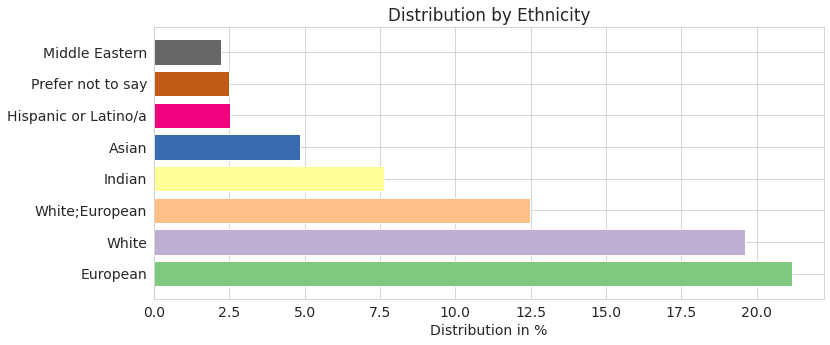

In [34]:
ethnicity = round(data.Ethnicity.value_counts()/data.Ethnicity.count() * 100,2)
ethnicity = ethnicity[ethnicity>2]
plt.title('Distribution by Ethnicity')
plt.xlabel('Distribution in %')
plt.barh(y=ethnicity.index,width=ethnicity,color=sns.color_palette('Accent'));

###### Insight

Respondents mostly belong to European, White, Indian communities 

# Branch

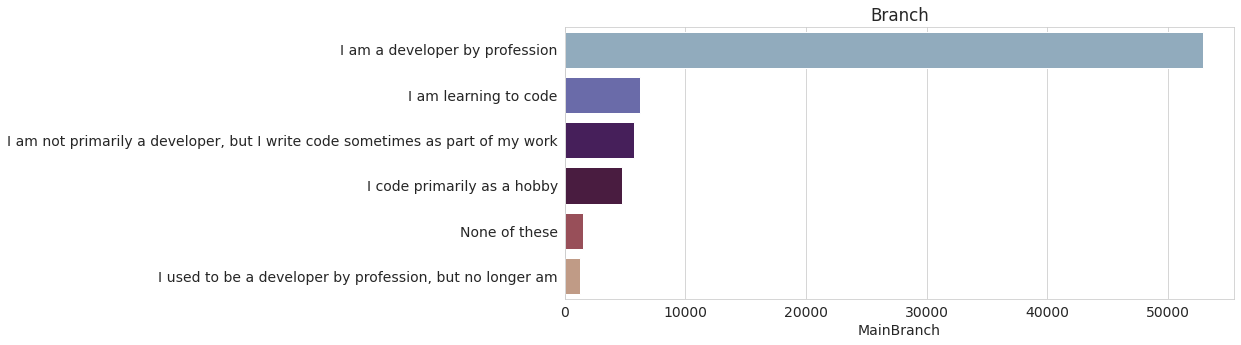

In [35]:
branch = data.MainBranch.value_counts()
plt.title('Branch')
sns.barplot(y=branch.index,x=branch,palette='twilight');

##### Insight

Most of the patrons of Stackoverflow are Developers by profession

# DevType

Devtype allows for multiple responses so we will need to split the values for a better representation

In [36]:
def multi_value_splitter(column_series):
    result_df = column_series.to_frame()
    options =[]
    for i,v in column_series[column_series.notnull()].items():
        for option in v.split(';'):
            if not option in options:
                options.append(option)
                result_df[option] = False
            result_df.at[i,option] = True
    return result_df
            

In [37]:
devtype = multi_value_splitter(data.DevType)
devtype.drop(columns=['Other (please specify):','DevType'],inplace=True)

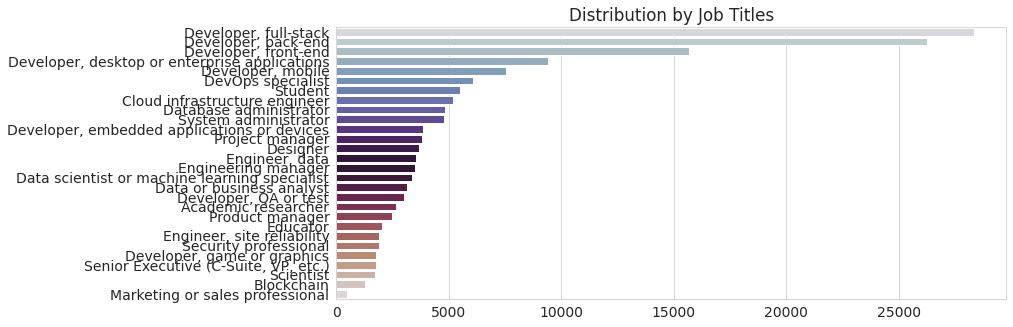

In [41]:
devtype = devtype.sum().sort_values(ascending=False)
plt.title('Distribution by Job Titles')
sns.barplot(y=devtype.index,x=devtype,palette='twilight');

##### Insight 

Most of the respondents work as Full-stack, Back-end, Front-end Developers

# Remote Workers

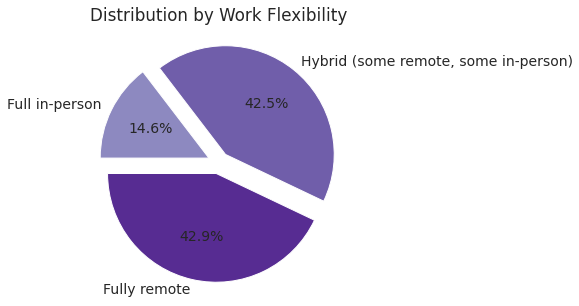

In [42]:
remote = data.RemoteWork.value_counts()
plt.title('Distribution by Work Flexibility')

plt.pie(remote,labels=remote.index,autopct='%1.1f%%',explode= [0.1,0.1,0.1] ,
        startangle=180,colors=sns.color_palette('Purples_r'));

###### Insight

Looks like most of the respondents have flexible jobs.

# What are the most popular programming languages in 2022?

In [43]:
toplanguage = multi_value_splitter(data.LanguageHaveWorkedWith)
toplanguage.drop(columns=['LanguageHaveWorkedWith'],inplace=True)
toplanguage.head()

,JavaScript,TypeScript,C#,C++,HTML/CSS,Python,SQL,Swift,PHP,C,Java,Delphi,Bash/Shell,PowerShell,Rust,Elixir,Erlang,Ruby,R,Scala,VBA,Dart,Go,Kotlin,Groovy,MATLAB,Perl,Lua,Haskell,Julia,LISP,Assembly,F#,Clojure,APL,Crystal,Fortran,Objective-C,SAS,OCaml,Solidity,COBOL
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,True,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,True,False,True,True,True,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,True,True,True,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,True,True,True,False,True,False,True,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


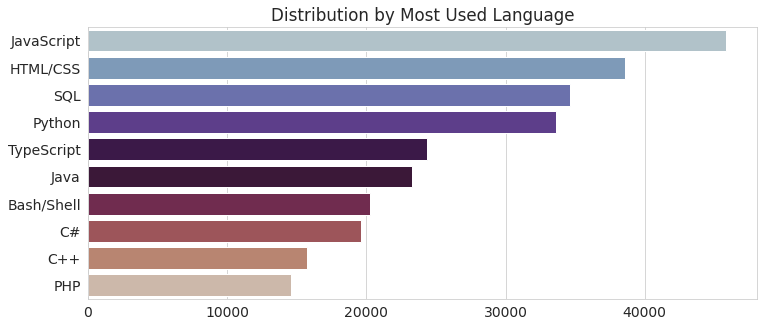

In [44]:
toplanguage = toplanguage.sum().sort_values(ascending=False).head(10)
plt.title('Distribution by Most Used Language')
sns.barplot(y=toplanguage.index,x=toplanguage,palette='twilight');

##### Insight

Javascript & HTML/CSS comes out at the top as web development is one of today's most sought skills.

Most programmers do work with SQL regularly.

Python seems to be the popular choice for other forms of development, beating out Java.

####  Countries with more than 250 responses only.

In [45]:
countries_250_resp = data.Country.value_counts()[(data.Country.value_counts())>250].index
countries_250_resp

Index(['United States of America', 'India', 'Germany',
       'United Kingdom of Great Britain and Northern Ireland', 'Canada',
       'France', 'Brazil', 'Poland', 'Netherlands', 'Spain', 'Italy',
       'Australia', 'Russian Federation', 'Turkey', 'Sweden', 'Switzerland',
       'Austria', 'Israel', 'Iran, Islamic Republic of...', 'Pakistan',
       'Czech Republic', 'China', 'Belgium', 'Bangladesh', 'Ukraine',
       'Romania', 'Mexico', 'Portugal', 'Denmark', 'Greece', 'Indonesia',
       'Argentina', 'Nigeria', 'South Africa', 'Norway', 'Finland', 'Hungary',
       'New Zealand', 'Egypt', 'Philippines', 'Bulgaria', 'Colombia', 'Japan',
       'Ireland', 'Viet Nam', 'Sri Lanka', 'Slovenia', 'Serbia', 'Kenya'],
      dtype='object')

####  Year group most active

In [46]:
data.YearsCode.value_counts(bins=10)

(5.1, 10.2]      20635
(-0.052, 5.1]    19839
(10.2, 15.3]     11062
(15.3, 20.4]      6770
(20.4, 25.5]      4580
(25.5, 30.6]      2910
(30.6, 35.7]      1733
(35.7, 40.8]      1708
(40.8, 45.9]       733
(45.9, 51.0]       400
Name: YearsCode, dtype: int64